In [1]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Use the ggplot style
plt.style.use('ggplot')

# Predictions and residuals of the FIA model
Remember that the model was: $$log(Biomass) \sim log(SppN) + Z(x) + \epsilon$$
Where Z(x) is a gaussian random field with mean 0 and $\Sigma^{+} = \rho(x,x^{'})$ 

We have done that analysis in former notebooks. This notebook considers that the file: `/RawDataCSV/predictions_residuals.csv` exists. 

In [198]:
path = "/RawDataCSV/predictions_w_residuals.csv"
data = pd.read_csv(path,index_col='Unnamed: 0')
data.shape

(36869, 9)

In [199]:
data.columns

Index([u'logBiomass', u'logSppN', u'residuals', u'predmean', u'mean_se',
       u'mean_ci_lower', u'mean_ci_upper', u'obs_ci_lower', u'obs_ci_upper'],
      dtype='object')

In [200]:
from statsmodels.api import OLS

In [201]:
mod_lin = OLS.from_formula('logBiomass ~ logSppN',data)

In [202]:
res = mod_lin.fit()

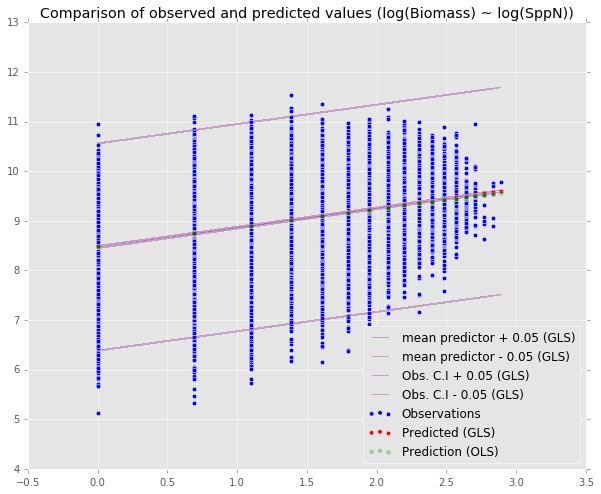

In [232]:
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')

plt.scatter(data.logSppN,data.logBiomass,label="Observations")
plt.scatter(data.logSppN,data.predmean,c='Red',label="Predicted (GLS)")
plt.scatter(data.logSppN,lnY,c='Green',label="Prediction (OLS)",alpha=0.3)
plt.plot(data.logSppN,data.mean_ci_upper,c='Purple',label="mean predictor + 0.05 (GLS)",alpha=0.3)
plt.plot(data.logSppN,data.mean_ci_lower,c='Purple',label="mean predictor - 0.05 (GLS)",alpha=0.3)
plt.plot(data.logSppN,data.obs_ci_upper,c='Purple',label="Obs. C.I + 0.05 (GLS)",alpha=0.3)
plt.plot(data.logSppN,data.obs_ci_lower,c='Purple',label="Obs. C.I - 0.05 (GLS)",alpha=0.3)


plt.title("Comparison of observed and predicted values (log(Biomass) ~ log(SppN))")
plt.legend(loc='lower right')

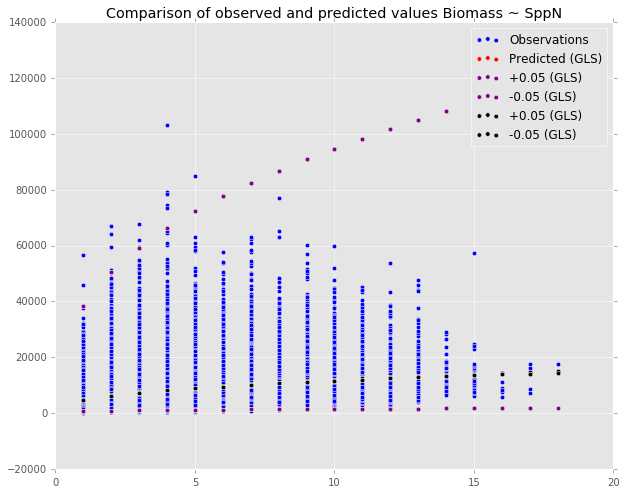

In [238]:
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')

plt.scatter(np.exp(data.logSppN),np.exp(data.logBiomass),label="Observations")
plt.scatter(np.exp(data.logSppN),np.exp(data.predmean),c='Red',label="Predicted (GLS)")
#plt.scatter(np.exp(data.logSppN),np.exp(lnY),c='Green',label="Prediction (OLS)")
plt.scatter(np.exp(data.logSppN),np.exp(data.obs_ci_upper),c='Purple',label="+0.05 (GLS)")
plt.scatter(np.exp(data.logSppN),np.exp(data.obs_ci_lower),c='Purple',label="-0.05 (GLS)")
plt.scatter(np.exp(data.logSppN),np.exp(data.mean_ci_upper),c='Black',label="+0.05 (GLS)")
plt.scatter(np.exp(data.logSppN),np.exp(data.mean_ci_lower),c='Black',label="-0.05 (GLS)")
plt.title("Comparison of observed and predicted values Biomass ~ SppN")
plt.legend(loc='upper right')

## Standard Error
Using the White’s (1980) heteroskedasticity robust standard errors.
I used the others: MacKinnon and White’s (1985) alternative heteroskedasticity robust standard error 

The values were the same.
Standard Errors:
* Intercept    0.011947
* logSppN      0.006440
